In [312]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy.optimize import minimize
%matplotlib inline

from scipy.misc import derivative
import scipy.stats as sts

import random
import seaborn

from numpy.random import choice
from scipy.stats import *

from math import*
from scipy.optimize import differential_evolution
from scipy.optimize import approx_fprime

from sklearn.metrics.pairwise import pairwise_distances

from scipy import linalg
from sklearn.decomposition import PCA


### Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [181]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

<b> a) </b> Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [246]:
cos_us = pairwise_distances(raitings, metric='cosine')
cos_us

array([[0.        , 0.17397081, 0.15078471, 0.21659884, 0.18082368,
        0.25881452, 0.27264172, 0.19032478, 0.08934018, 0.13989224],
       [0.17397081, 0.        , 0.18765675, 0.15364663, 0.12861948,
        0.17286893, 0.17370316, 0.19973997, 0.17473692, 0.18031873],
       [0.15078471, 0.18765675, 0.        , 0.15330626, 0.21605701,
        0.20902015, 0.32383777, 0.23710448, 0.17887923, 0.08126949],
       [0.21659884, 0.15364663, 0.15330626, 0.        , 0.30846591,
        0.21334208, 0.16725789, 0.17065333, 0.2229334 , 0.1411313 ],
       [0.18082368, 0.12861948, 0.21605701, 0.30846591, 0.        ,
        0.2235566 , 0.21799532, 0.18763131, 0.12051523, 0.15425211],
       [0.25881452, 0.17286893, 0.20902015, 0.21334208, 0.2235566 ,
        0.        , 0.25988199, 0.15548315, 0.19377124, 0.14485092],
       [0.27264172, 0.17370316, 0.32383777, 0.16725789, 0.21799532,
        0.25988199, 0.        , 0.17330826, 0.18869956, 0.20845282],
       [0.19032478, 0.19973997, 0.2371044

In [301]:
index = 0
print(f'10 пар вида (x, y) где y - наиболее похожий пользователь на пользователя x):')
for i in cos_us:
    ko = list(i).index(np.min(i[np.nonzero(i)])) + 1
    index += 1
    print(f'({index}, {ko})')


10 пар вида (x, y) где y - наиболее похожий пользователь на пользователя x):
(1, 9)
(2, 5)
(3, 10)
(4, 10)
(5, 9)
(6, 10)
(7, 4)
(8, 6)
(9, 1)
(10, 3)


<b> b) </b>Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [323]:
pca = PCA(n_components=5)
mc = pca.fit_transform(raitings)
mc

array([[-5.30986101,  1.92919845, -4.93300027,  2.70188013,  5.50497886],
       [ 2.87763403,  2.71659559,  1.40592782,  7.26325751, -4.50322291],
       [-4.94010408, -6.68861167, -0.94550184,  3.61556661, -0.68969272],
       [ 5.14939908, -6.28027284, -4.65978558,  1.09024004, -1.01471112],
       [-1.37488691,  7.54357985,  4.00834369,  2.1284001 , -0.16324949],
       [ 2.65341956, -3.77075601,  8.58430748, -1.46628319,  1.67401769],
       [ 8.61573944,  3.78603335, -4.02721027, -4.37582577, -3.13880277],
       [ 5.39658258, -1.0170466 ,  1.01456742, -1.89512837,  6.54883538],
       [-5.7843488 ,  5.29857107, -1.48083611, -3.71295542,  0.21312695],
       [-7.2835739 , -3.51729118,  1.03318766, -5.34915166, -4.43127987]])

In [324]:
pca.explained_variance_ratio_

array([0.25373748, 0.1970209 , 0.14113306, 0.12956371, 0.11289928])

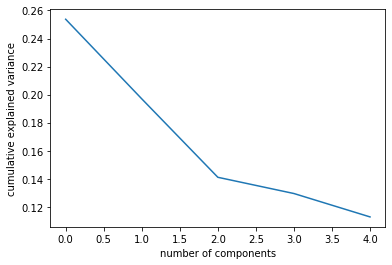

In [320]:
pcamodel = PCA(n_components=5)
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

### Задание 2

Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ на python и на бумаге (просто подставить точку в производную и ничего не упрощать).

In [5]:
# производная
from sympy import *

x, y = symbols('x y')
diff((tan(sin(x) + cos(2 * x + 3))) ** 2)

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

In [6]:
# производная в точке x=1
x, y = symbols('x y')
diff((tan(sin(1) + cos(2 * 1 + 3))) ** 2)

0

In [45]:
# def f(x):
    
#     return (tan(sin(x) + cos(2 * x + 3))) ** 2

# derivative(f, 1.0, dx=1e-6)

### Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку <b>error</b>

In [7]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [8]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [9]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

In [10]:
# plt.plot(x, fx)
# plt.show()

In [11]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [18]:
minimize(error, (1, 1), method='COBYLA')

     fun: 236.995326807352
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 118
  status: 1
 success: True
       x: array([2.02785557, 0.30403095])

### Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

##### Создайте случайную величину из любого выбранного вами распределения, для разных значений n сгенерируйте 1000 выборок размера n и постройте гистрограммы средних этих выборок.

In [352]:
p=0.3
rv  =  sts.expon()  ### YOUR CODE HERE
sample = rv.rvs(size=20)

#параметры запуска: размеры выборок и количество повторов генерации
n1 = 50
# YOUR CODE HERE
samples_count = 1000
#массивы для сохранения средних по выборкам
a1 = np.array([])

for number in range(samples_count):
    # на каждом цикле генерируем выборки разных размеров
    sample1 = rv.rvs(size=n1)
    # YOUR CODE HERE
    # считаем среднее по каждой выборке и добавляем в массив средних
    a1 = np.append(a1, sample1.mean())
#     print(a1)

Text(0.5, 0, '$x$')

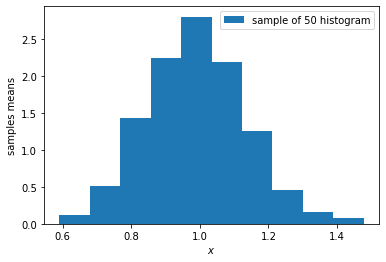

In [353]:
#строим графики
#подписи для графиков
label_1 = 'sample of ' + str(n1) + ' histogram'
plt.hist(a1, density=True, label=label_1)

plt.legend()
plt.ylabel('samples means')
plt.xlabel('$x$')


Text(0.5, 0, '$x$')

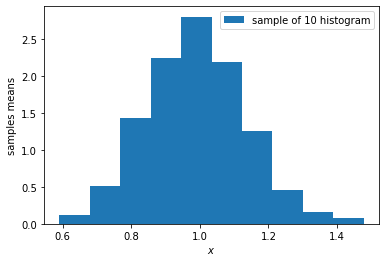

In [354]:
#строим графики
#подписи для графиков
label_1 = 'sample of ' + str(10) + ' histogram'
plt.hist(a1, density=True, label=label_1)

plt.legend()
plt.ylabel('samples means')
plt.xlabel('$x$')


Text(0.5, 0, '$x$')

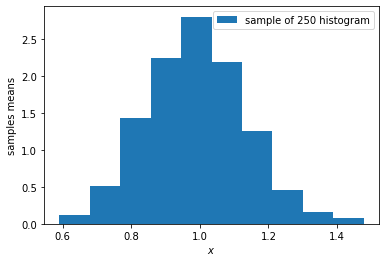

In [355]:
#строим графики
#подписи для графиков
label_1 = 'sample of ' + str(250) + ' histogram'
plt.hist(a1, density=True, label=label_1)

plt.legend()
plt.ylabel('samples means')
plt.xlabel('$x$')


Text(0.5, 0, '$x$')

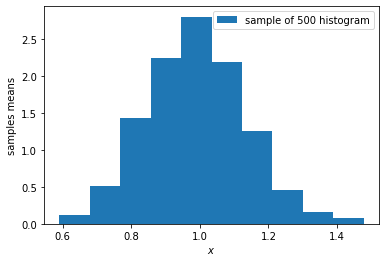

In [356]:
#строим графики
#подписи для графиков
label_1 = 'sample of ' + str(500) + ' histogram'
plt.hist(a1, density=True, label=label_1)

plt.legend()
plt.ylabel('samples means')
plt.xlabel('$x$')


Text(0.5, 0, '$x$')

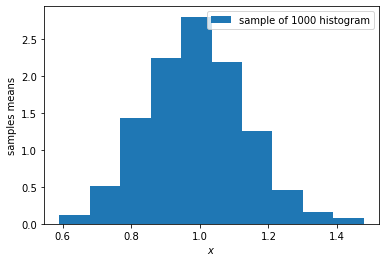

In [357]:
#строим графики
#подписи для графиков
label_1 = 'sample of ' + str(1000) + ' histogram'
plt.hist(a1, density=True, label=label_1)

plt.legend()
plt.ylabel('samples means')
plt.xlabel('$x$')


### Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге)

[[1, 4],

 [1, 1]]

In [3]:
# Собственные векторы и собственные значения
a = np.array([[1, 4], [1, 1]])
w, v = np.linalg.eig(a)
print(a)

[[1 4]
 [1 1]]


In [4]:
for i in range(len(w)):
    print("Собственное значение " + str(round(w[i])))
    print("соответствующий ему собственный вектор " + str(v[:,i]))

Собственное значение 3.0
соответствующий ему собственный вектор [0.89442719 0.4472136 ]
Собственное значение -1.0
соответствующий ему собственный вектор [-0.89442719  0.4472136 ]
